# Screencast

In this Notebook I´ll be working on the question if the compensation of male and female developers is related to their working experience and if there are any differences in male or female distribution.

I´ll use the stackoverflow survey data from 2020.

First I'll read in the necessary libraries for data wrangling and building plots. Moreover I´ll read in the csv file and hava a first look at the data in the dataset.

In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('/Users/anna/Downloads/developer_survey_2020/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
# Filtering the dataset, to only get professional developers that 
# belong to the Gender 'male' or 'female'

df=pd.DataFrame(df.query("MainBranch == 'I am a developer by profession' and (Gender=='Man' or Gender=='Woman')"))

In [4]:
#Dropping NaNs from the Converted Compensation and the 'YearsCodePro' column
df=df.dropna(subset=['ConvertedComp','YearsCodePro'])
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
13,14,I am a developer by profession,Yes,27.0,13,Yearly,66000.0,66000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Vue.js,Angular;Vue.js,Just as welcome now as I felt last year,40.0,5,1


In [11]:
# Replacing the strings in the 'YearsCodePro' column by integers

df.loc[:,'YearsCodePro']=df.loc[:,'YearsCodePro'].str.replace('Less than 1 year', '0')

df.loc[:,'YearsCodePro']=df.loc[:,'YearsCodePro'].str.replace('More than 50 years', '51')

# Transfer the 'YearsCodePro' column to float 
df.loc[:,'YearsCodePro']=df.loc[:,'YearsCodePro'].astype(float)

# Check how the column changed
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28794 entries, 7 to 64152
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    28794 non-null  int64  
 1   MainBranch                    28794 non-null  object 
 2   Hobbyist                      28794 non-null  object 
 3   Age                           27147 non-null  float64
 4   Age1stCode                    28747 non-null  object 
 5   CompFreq                      28794 non-null  object 
 6   CompTotal                     28794 non-null  float64
 7   ConvertedComp                 28794 non-null  float64
 8   Country                       28794 non-null  object 
 9   CurrencyDesc                  28794 non-null  object 
 10  CurrencySymbol                28794 non-null  object 
 11  DatabaseDesireNextYear        23011 non-null  object 
 12  DatabaseWorkedWith            25814 non-null  object 
 13  D

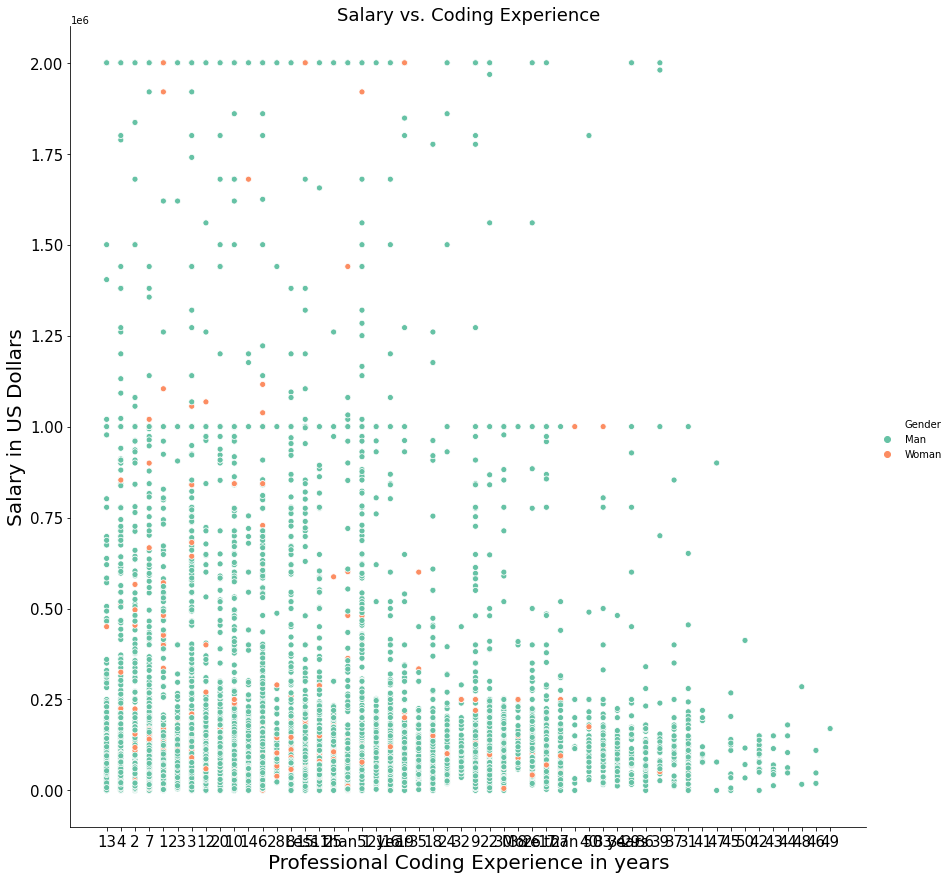

In [6]:
# Make a scatterplot of Salary vs. professional coding experience
# for male and female developer

sns.relplot(x='YearsCodePro',y='ConvertedComp', hue='Gender',palette='Set2', data= df, height=12)

# label the axis and add a title
plt.title("Salary vs. Coding Experience", size=18)
plt.ylabel("Salary in US Dollars", size=20)
plt.xlabel("Professional Coding Experience in years", size=20)

# customize size of ticks
plt.xticks(size=15)
plt.yticks(size=15)

#save figure for use in blogpost
plt.savefig('Salary vs. Coding Experience.png',bbox_inches='tight')



In [12]:
# create two dataframes: one for female professional developer and
# one for male professional developer
df_fem=pd.DataFrame(df.query("MainBranch == 'I am a developer by profession' and Gender=='Woman'"))
df_mal=pd.DataFrame(df.query("MainBranch == 'I am a developer by profession' and Gender=='Man'"))

<Figure size 1440x1440 with 0 Axes>

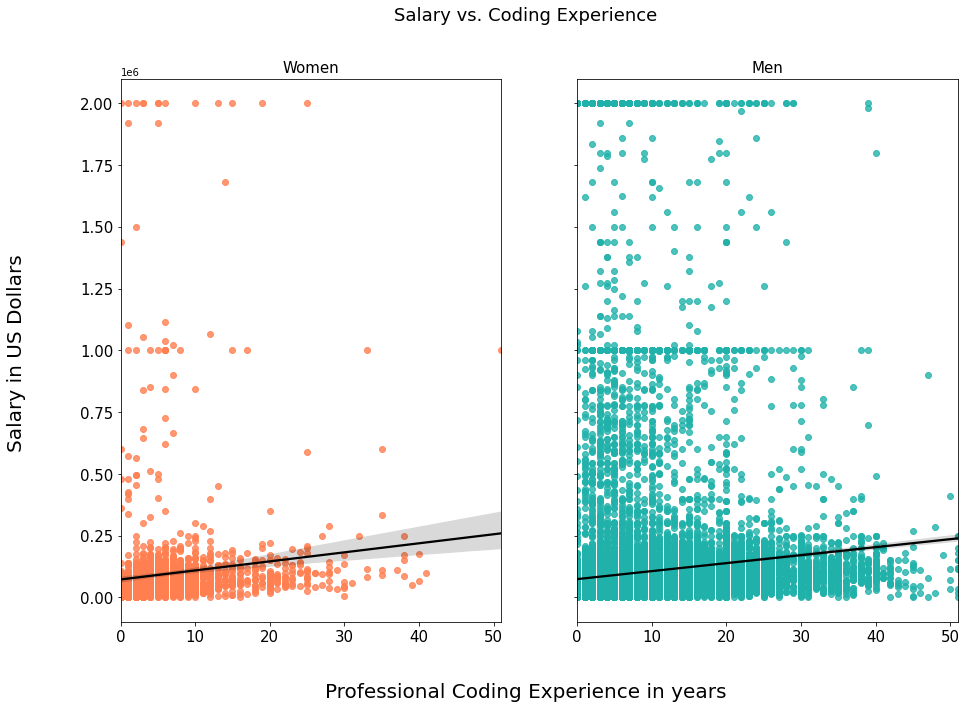

In [15]:
# Create a figure with two horizontal subplots
plt.figure(figsize=(20,20))
fig, ax =plt.subplots(1,2,sharex=True, sharey=True,figsize=(15,10))

# Make regression plot of female Salary and YearsCodePro, customize regression line and color 
ax1=sns.regplot(x='YearsCodePro',y='ConvertedComp', data= df_fem, color='coral',line_kws={"color": "black"},ax=ax[0])
ax1.set_title('Women',size=15)
ax1.set_ylabel('')    
ax1.set_xlabel('')

# Make regression plot of male Salary and YearsCodePro, customize regression line and color
ax2=sns.regplot(x='YearsCodePro',y='ConvertedComp', data= df_mal, color='lightseagreen',line_kws={"color": "black"},ax=ax[1])
ax2.set_title('Men',size=15)
ax2.set_ylabel('')    
ax2.set_xlabel('')

#add title and label common axis
fig.suptitle('Salary vs. Coding Experience',size=18)
fig.text(0.5, 0.02, 'Professional Coding Experience in years', ha='center',size=20)
fig.text(0.02, 0.5, 'Salary in US Dollars', va='center', rotation='vertical',size=20)

#Figure 1 is updated to the parent of ax. and ticks are customized
plt.sca(ax[0])
plt.xticks(size=15)
plt.yticks(size=15)

#Figure 2 is updated to the parent of ax. and ticks are customized
plt.sca(ax[1])
plt.xticks(size=15)
plt.yticks(size=15)


# save figure for use in blogpost
plt.savefig('Salary vs. Coding Experience Men_Women.png',bbox_inches='tight')


It looks like there is almost no difference in the correlation of expoerience and compensation between male and female developers. As a last check i did a correlation matrix to see if they are really the same. 

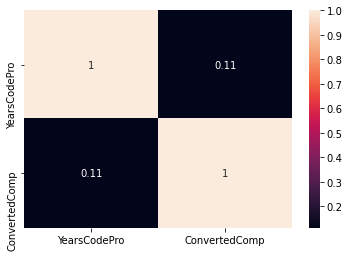

In [22]:
# Create dataframe with YearsProCode and ConvertedComp column 
# and plot a heatmap (male developers)

df_mal=df_mal.loc[:,('YearsCodePro','ConvertedComp')]
corrMatrix = df_mal.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

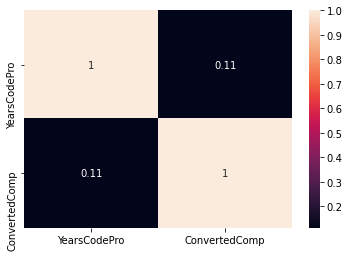

In [23]:
# Create dataframe with YearsProCode and ConvertedComp column 
# and plot a heatmap (female developers)

df_fem=df_fem.loc[:,('YearsCodePro','ConvertedComp')]
corrMatrix = df_fem.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()